# Oblate fast-rotating star model example

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pytransit import OblateStarModel, QuadraticModel

In [3]:
tmo = OblateStarModel(sres=100, pres=8)
tmc = QuadraticModel(interpolate=False)

In [4]:
times = linspace(-0.35, 0.35, 500)
tmo.set_data(times)
tmc.set_data(times)

## Comparison with the quadratic model

The model can be evaluated for a set of scalar parameters using the ``tm.evaluate_ps`` method. The oblate model takes, in addition to the basic orbital parameters, the stellar rotation period ``rperiod``, pole temperature ``tpole``, obliquity ``phi``, gravity-darkening parameter ``beta``, and azimuthal angle ``az``.

The oblate model should be identical to the quadratic model if we set either the rotation period to a large value or the gravity-darkening parameter to zero.

In [5]:
k = array([0.1])
t0, p, a, i, az, e, w = 0.0, 4.0, 4.5, 0.5*pi, 0.0, 0.0, 0.0
rho, rperiod, tpole, phi, beta = 1.4, 0.25, 6500., -0.2*pi, 0.3
ldc = array([0.3, 0.1]) # Quadtratic limb darkening coefficients

In [6]:
flux_qm = tmc.evaluate_ps(k, ldc, t0, p, a, i, e, w)

In [7]:
rperiod = 10
flux_om = tmo.evaluate_ps(k, rho, rperiod, tpole, phi, beta, ldc, t0, p, a, i, az, e, w)

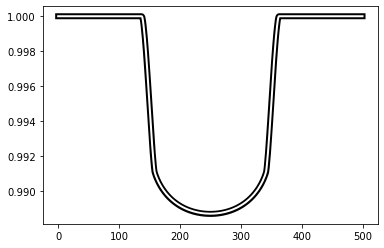

In [8]:
plot(flux_qm, lw=6, c='k')
plot(flux_om, lw=2, c='w');

There's a small deviation at the beginning of ingress and end of egress, and I'll need to look into what's causing it... (-Hannu, 27. Aug. 2020)

## Changing obliquity

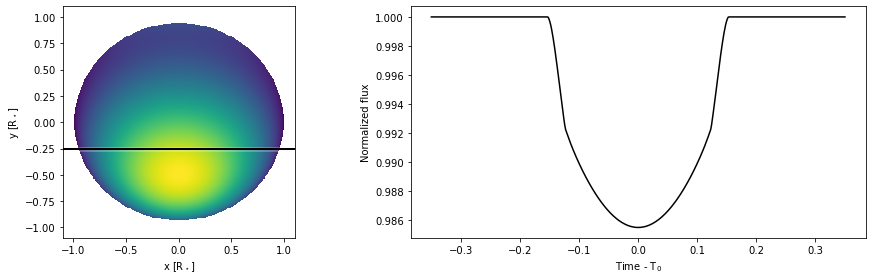

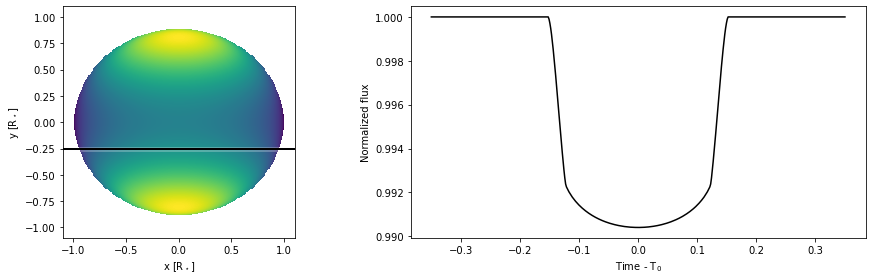

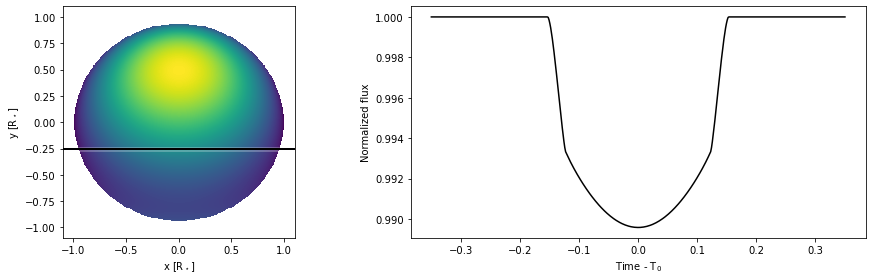

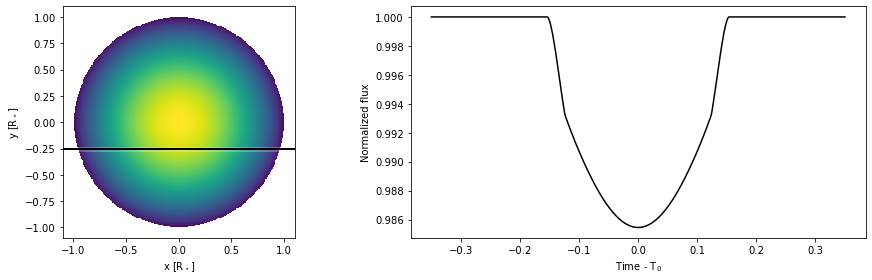

In [9]:
rperiod = 0.25
b = 0.25
for phi in (-0.25*pi, 0.0, 0.25*pi, 0.5*pi):
    tmo.visualize(0.1, b, 0.0, rho, rperiod, tpole, phi, beta, ldc, ires=256)

## Changing azimuth angle

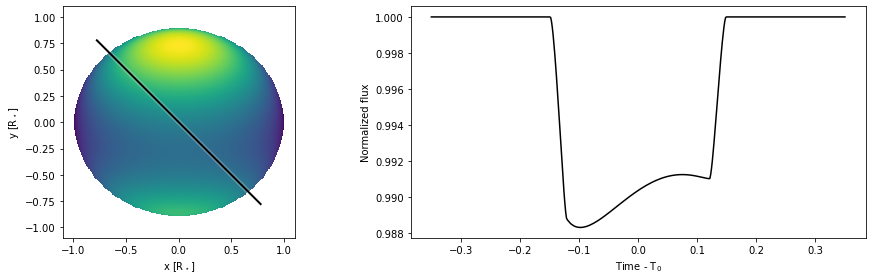

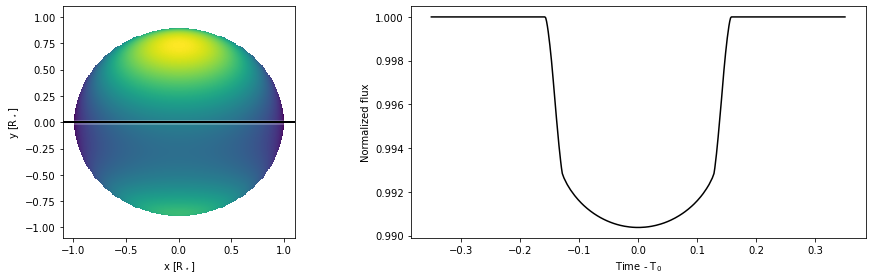

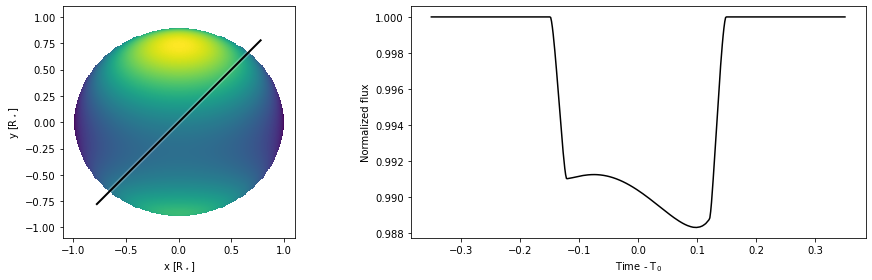

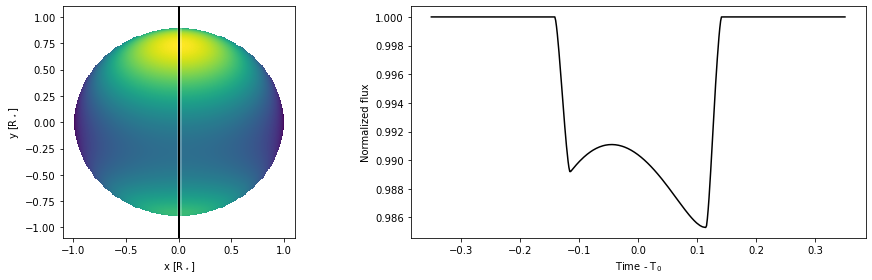

In [10]:
rperiod = 0.25
phi = 0.25
b = 0.00
for az in (-0.25*pi, 0.0, 0.25*pi, 0.5*pi):
    tmo.visualize(0.1, b, az, rho, rperiod, tpole, phi, beta, ldc, ires=256)

---

<center>©2020 Hannu Parviainen</center>